![](task2.PNG)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Load Dataset

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Input Data

In [3]:
x = df.drop(['Id','Species'],axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Target Data

In [5]:
target = df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

Here  '0'  represent 'setosa'   ||   '1' represent 'versicolor'   ||   '2' represent 'virginica'

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Plotting scatter plot to visualize the distribution

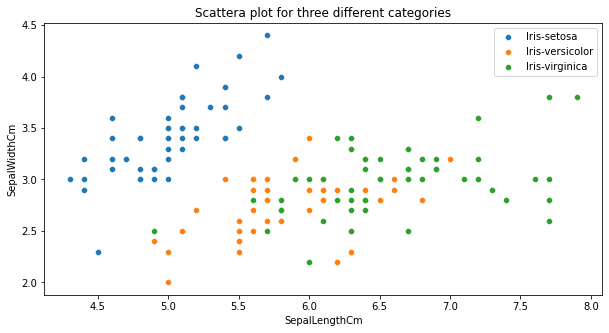

In [7]:
plt.figure(figsize=(10,5))
plt.title('Scattera plot for three different categories')
sns.scatterplot(data = df.head(50),x = 'SepalLengthCm', y = 'SepalWidthCm')
sns.scatterplot(data = df[df.Species=='Iris-versicolor'],x = 'SepalLengthCm', y = 'SepalWidthCm')
sns.scatterplot(data = df.tail(50),x = 'SepalLengthCm', y = 'SepalWidthCm')
plt.legend(labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']);

### Splitting Data into train and test data set

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,target,test_size=0.2,random_state=42)

### Hyperparameter Tuning

In [10]:
from sklearn.model_selection import RandomizedSearchCV

In [11]:
params = {'max_depth':[2,3,4,5,6,8],
         'min_samples_split':[2,3,4,6,8],
         'min_samples_leaf':[2,3,4]
         }

In [12]:
rc = RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=params,n_jobs=-1,cv=5)

In [13]:
rc.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 8],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 6, 8]})

In [14]:
rc.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=4)

### Model Building using DecisionTreeClassifier

In [15]:
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=6)

In [16]:
model.fit(x_train,y_train)
print('train_score : ' + str(model.score(x_train,y_train)))
print('test_score : ' + str(model.score(x_test,y_test)))

train_score : 0.9666666666666667
test_score : 1.0


In [17]:
ypred = model.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix

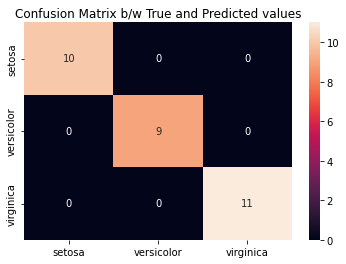

In [19]:
cm = confusion_matrix(y_test,ypred)
ax = plt.subplot()
ax.set_title('Confusion Matrix b/w True and Predicted values')
sns.heatmap(cm,annot=True,ax=ax)
ax.xaxis.set_ticklabels(['setosa','versicolor','virginica'])
ax.yaxis.set_ticklabels(['setosa','versicolor','virginica']);

### Predict the Iris flower category by passing its features

In [20]:
SepalLengthCm = float(input('SepalLengthCm : '))
SepalWidthCm = float(input('SepalWidthCm : '))
PetalLengthCm = float(input('PetalLengthCm : '))
PetalWidthCm = float(input('PetalWidthCm : '))

pred = model.predict([[SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]])[0]
if pred == 0:
    print('Species is : ' + 'Iris-setosa')
elif pred ==1:
    print('Species is : ' + 'Species is : ' + 'Iris-versicolor')
else:
    print('Species is : ' + 'Iris-virginica')

SepalLengthCm : 4.7	
SepalWidthCm : 3.2
PetalLengthCm : 1.3
PetalWidthCm : 0.2
Species is : Iris-setosa
